

https://github.com/thachkse/Intro-to-ML/tree/main/HW_1

Kim Thach *800793249*

ECGR 5090 - C01


To quickly view answers, please check out the navigation pane in the notebook. Subheaders labeled as a `Observations` will provide direct insight to all questions. 


## Initiliazing Workspace and Functions

This section will identify libraries and define functions that will implemented throughout the code. The following functions to be used are:

`binary_map()` - defines `yes` as `1` and `no` as `2`

`compute_cost()` - is the linear regression training loop, which outputs the cost of your dataset.

`gradient_descent()` - iterates through all rows of your dataset and calculates your cost and new theta values in each iteration, for a specified number of iterations and learning rate.

`modelnplot()` - Takes Dataframe format, runs it through a linear regression model, output cost history and plot loss over iterations. 

`modelpenalty()` - Uses all the same steps used in `modelnplot()` but implements parameter penalities, when calculating for each parameter.






In [304]:
import numpy as np
import pandas as pd

# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns


In [305]:
# Binary mapping
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression line, we would need numerical values and not string.
# List of variables to map
           
# Defining the map function
def binary_map(x):
 return x.map({'yes': 1, "no": 0})



In [306]:
# Regression / Training Loop

# Training Loop

def compute_cost(X,y,theta):
    
    """ 
    Compute cost for linear regression.

    Input Parameters
    ----------------
    X : 2D array where each row represent the training example and each column represent
        m= number of training examples
        n= number of features (including x0 column of ones)
    y: 1D array of labels/target value for each training example. Dimension (1 x m)

    theta :  1D array of fitting paramenters or weights. Dimension (1 x n)

    Output Parameters
    ----------------
    J: Scalar value.
    """
    m = len(y)
    predictions = X.dot(theta)
    errors = np.subtract(predictions,y)
    sqrErrors = np.square(errors)
    J = 1/(2*m)*np.sum(sqrErrors)
    return J


In [307]:
def gradient_descent(X,y,theta,alpha,iterations):

    cost_hist = np.zeros(iterations)
    m = len(y)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta = theta - sum_delta
        cost_hist[i] = compute_cost(X,y,theta)

    return theta, cost_hist

In [308]:
def gd_pen(X,y,theta,alpha,iterations,lmba):

    cost_hist = np.zeros(iterations)
    m = len(y)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        reg = theta * (1 - (alpha*(lmba/m)))
        sum_delta = reg-((alpha / m) * X.transpose().dot(errors))
        theta = theta - sum_delta
        cost_hist[i] = compute_cost(X,y,theta)

    return theta, cost_hist

In [309]:
def modelnplot(Xin,Yout,alpha,iterations):
    
    # Remove the price feature from the df in the training set (Independent variable)
    
    Yout = Yout
    
    # Dependent variables used in the training set.

    X = Xin
    m = len(Yout)
    
    # Create a vector of ones
    x0=np.ones((m,1))
    
    #  the 2 vectors side by side.
    XF=np.hstack((x0,X.values))
    
    # Set the number of parameters in your model
    
    xcols = XF.shape[1]
    theta=np.zeros(xcols)
    
    
    cost = compute_cost(XF,Yout,theta)
    print('The cost for given values of all parameters ', cost)
    
    theta=np.zeros(xcols)
    thetafinal, cost_hist = gradient_descent(XF,Yout,theta,alpha,iterations)
    print('Final value of theta =', thetafinal)
    
    plt.figure()
    plt.plot(range(1,iterations+1),cost_hist,color='blue')
    plt.rcParams["figure.figsize"] = (10,6)
    plt.grid()
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost (J)')
    plt.title('Convergence of gradient descent')

    return XF, Yout, thetafinal, cost, cost_hist 

In [310]:
def val_loss(X,y,theta,iterations):

    m = len(y)
    for i in range(iterations):
        cost_hist[i] = compute_cost(X,y,theta)

    return cost_hist


In [311]:
def modelpenalty(Xin,Yout,alpha,iterations,lamb):
    
    Yout = Yout
    
    # Dependent variables used in the training set.

    X = Xin
    m = len(Yout)
    
    # Create a vector of ones
    x0=np.ones((m,1))
    
    #  the 2 vectors side by side.
    XF=np.hstack((x0,X))
    
    # Set the number of parameters in your model
    
    xcols = X.shape[1]
    theta=np.zeros(xcols)
    
    
    cost = compute_cost(X,Yout,theta)
    print('The cost for given values of all parameters ', cost)
    
    theta=np.zeros(xcols)
    thetafinal, cost_hist = gd_pen(X,Yout,theta,alpha,iterations,lamb)
    print('Final value of theta =', thetafinal)
    
    plt.figure()
    plt.plot(range(1,iterations+1),cost_hist,color='blue')
    plt.rcParams["figure.figsize"] = (10,6)
    plt.grid()
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost (J)')
    plt.title('Convergence of gradient descent')

    return thetafinal, cost, cost_hist 

## Data

This study will use real estate data to generate a model for the housing market, using several features of the dataset. This study will also explore the various configurations a model can be created by scaling / not-scaling features and properly splitting training and validations sets from the data. This specific section on data demonstrate how to import data, clean & prep data and as well, as well as how to split data.

In [312]:
# Import data

housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [313]:
# Identify some of the Data's parameters

print('The # of samples of homes in this dataset is ' + str(housing.shape[0]))
print('The # of features available in this dataset is ' + str(housing.shape[1]))


The # of samples of homes in this dataset is 545
The # of features available in this dataset is 13


In [314]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [315]:
# Identify some general statistical information about the dataset

housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Clean and Prep Data

Initially we could manually identify the features which used a binary answer format like a `yes` & `no` and plug those strings into to the function `binary_map()`. In place of that, we identified the `dtypes` of the dataset and grouped them. All `objects` seemed to contain a `yes` or `no` response format, except a feature idenitified as an object in the last column. So we just removed that from the list of strings. There's probably more efficient approaches. 

In [316]:

g = housing.columns.to_series().groupby(housing.dtypes).groups
print(g)

{int64: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], object: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']}


In [317]:
colvar = housing.select_dtypes(include=['object'])
colvar

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [318]:
listx = list(colvar.columns)
print(listx)
varlist = listx[:-1]
print(varlist)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


In [319]:
# Apply binary_map here

housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### Training & Test Sets

In [320]:
# Splitting the Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the 

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 42)

df_train.shape

(381, 13)

In [321]:
df_test.shape

(164, 13)

# Problem 1

## 1A

Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables:

**area, bedrooms, bathrooms, stories, parking**

In [322]:

# Create a model from the housing data using only the features identified in the the var num_vars

num_vars = ['area','bedrooms','bathrooms','stories','parking','price']

# Create a train1 and test 1 df containing only the features listed above.
train1 = df_train[num_vars] # Training set
test1 = df_test[num_vars]   # Test Set

# Verify the new df's contain only the features described in num_vars
train1.head()

,area,bedrooms,bathrooms,stories,parking,price
126,7160,3,1,1,2,5880000
363,3584,2,1,1,0,3710000
370,4280,2,1,1,2,3640000
31,7000,3,1,4,2,8400000
113,9620,3,1,1,2,6083000


In [323]:
# Pull out the price column 
Yout = train1.pop('price')
Xenter = train1

<Figure size 720x432 with 0 Axes>

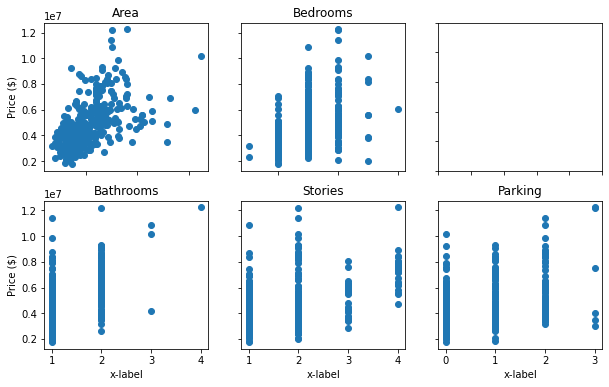

In [324]:
# Subplots of everything - Not possible to fit all features onto a single plot

plt.figure()
fig, axs = plt.subplots(2, 3)
axs[0, 0].scatter(Xenter.values[:,0], Yout)
axs[0, 0].set_title('Area')
axs[0, 1].scatter(Xenter.values[:,1], Yout)
axs[0, 1].set_title('Bedrooms')
axs[1, 0].scatter(Xenter.values[:,2], Yout)
axs[1, 0].set_title('Bathrooms')
axs[1, 1].scatter(Xenter.values[:,3], Yout)
axs[1, 1].set_title('Stories')
axs[1, 2].scatter(Xenter.values[:,4], Yout)
axs[1, 2].set_title('Parking')


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='Price ($)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

The cost for given values of all parameters  12911039312475.197
Final value of theta = [nan nan nan nan nan nan]


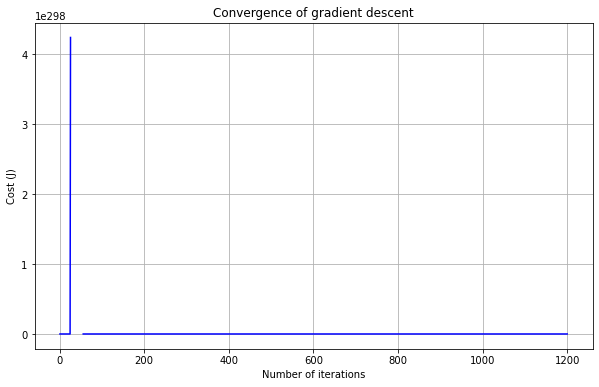

In [325]:
#Training Data
# Implement the modelnplot function to determine the best output
XTrain1, YTrain1, tr1theta, tr1cost, tr1cost_hist = modelnplot(Xenter,Yout,0.01,1200)

The cost for given values of all parameters  12911039312475.197
Final value of theta = [-1.16984631e+54 -7.07801301e+57 -3.51669366e+54 -1.52185498e+54
 -2.11438639e+54 -9.16695431e+53]


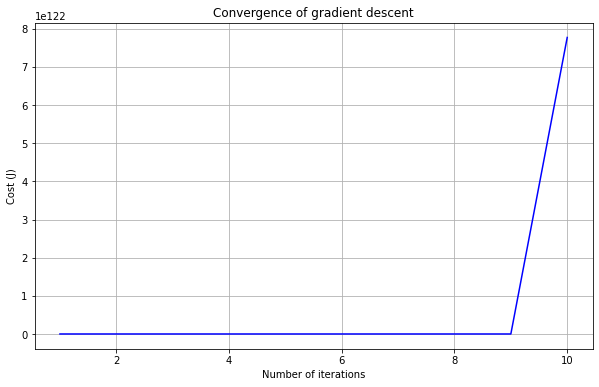

In [326]:
XTrain1, YTrain1, tr1theta, tr1cost, tr1cost_hist = modelnplot(Xenter,Yout,0.01,10)

The cost for given values of all parameters  12911039312475.197
Final value of theta = [2.61190123e+01 1.56443907e+05 7.87108591e+01 3.41603106e+01
 4.75505433e+01 2.04795772e+01]


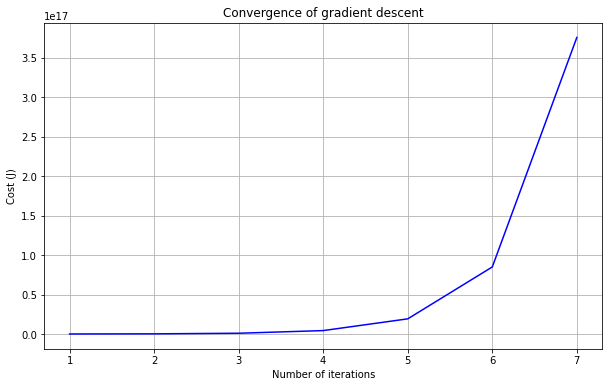

In [327]:
XTrain1, YTrain1, tr1theta, tr1cost, tr1cost_hist = modelnplot(Xenter,Yout,0.0000001,7)

Below is a summary of the learning rates and iterations applied in the plots above:

|Trial  | alpha | iteration |
|-------|-------|-----------|
|1      |  .01  | 1200      |
|2      |  .01  |  10       |
|3      | .0000001 | 10 |


Typical values used in the previous HW (HW0) did not work in this example. The final theta / parameter values were not able to be calculated. There is a large variation between the values of our features in the dataset. The area and price feature is *significantly* larger than the other features which typically included binary responses `1` or `0`. This may have caused the major errors in the calculation, providing a significantly small values overall, which could not be computed?

The best outcome for this example to converge, was either have a very finite learning rate like `.0000001` or apply a very small number of iterations, like less than `10`. The best learning rate and iterations for our model was trial 3. 


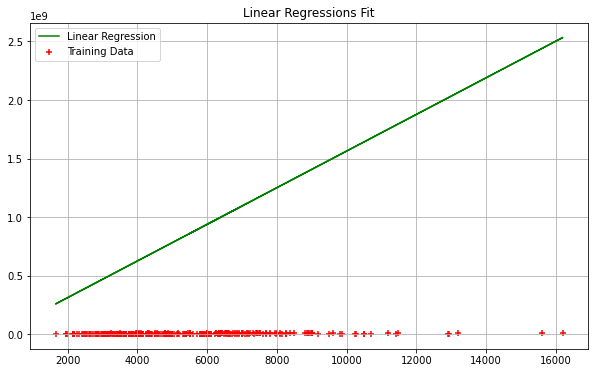

In [328]:
# Attempting to plot some of the training data and the linear regression. The data does not seem to fit well. The linear regression is also mult-dimensional, 
# so this may not be the best way to visualize the relationship between the dataset and and the regression.

plt.figure()
plt.scatter(XTrain1[:,1],YTrain1,color='red',marker='+',label='Training Data')
plt.plot(XTrain1[:,1],XTrain1.dot(tr1theta),color='green',label='Linear Regression')
plt.rcParams['figure.figsize'] = (10,6)
plt.grid()
plt.title('Linear Regressions Fit')
plt.legend()


The cost for given values of all parameters  13561972199306.402
Final value of theta = [3.21366570e+01 1.94415538e+05 9.74595831e+01 4.48417097e+01
 6.15745251e+01 2.91817809e+01]


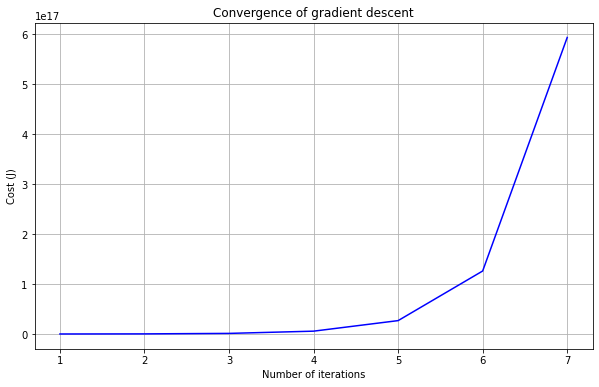

In [329]:
## Test Data

test1 = df_test[num_vars]
Ytst1 = test1.pop('price')
m = len(Ytst1)
xone = np.ones((m,1))
Xtst1 = np.hstack((xone,test1.values))
X = test1
Y = Ytst1

XVal1, YVal1, tr1Valtheta, tr1valcost, tr1valcost_hist = modelnplot(X,Y,0.0000001,7)


The percent error of the model is:  18427.450319565556


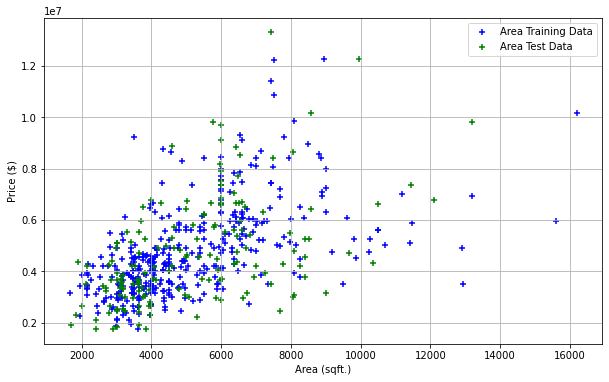

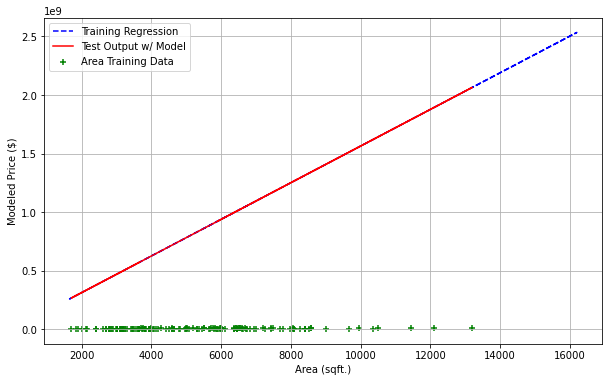

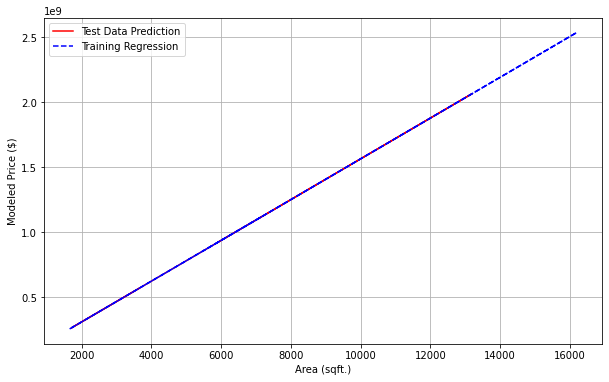

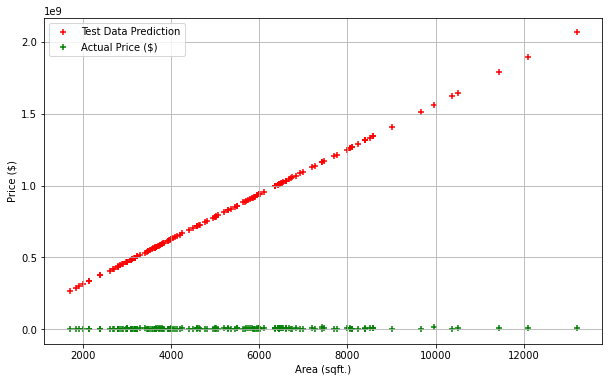

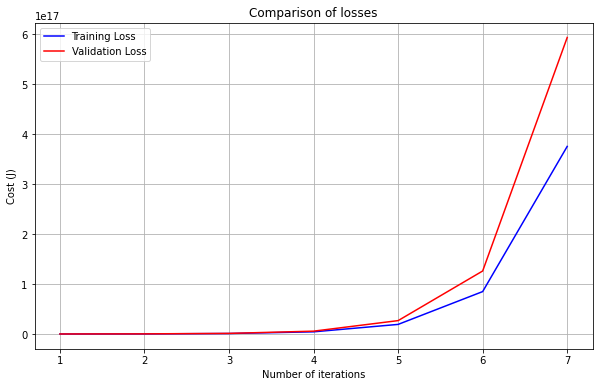

In [330]:
# Validate the test model

Ycheck = Xtst1.dot(tr1theta)

plt.figure()
plt.scatter(XTrain1[:,1],YTrain1,color='blue',marker='+',label='Area Training Data')
plt.scatter(Xtst1[:,1],Ytst1,color='green',marker='+',label='Area Test Data')
plt.xlabel('Area (sqft.)')
plt.ylabel('Price ($)')
plt.grid()
plt.legend()

plt.figure()
plt.scatter(Xtst1[:,1],Ytst1,color='green',marker='+',label='Area Training Data')
plt.plot(XTrain1[:,1],XTrain1.dot(tr1theta),color='blue',label='Training Regression',linestyle='dashed')
plt.plot(Xtst1[:,1],Ycheck,color='red',label='Test Output w/ Model')
plt.xlabel('Area (sqft.)')
plt.ylabel('Modeled Price ($)')
plt.grid()
plt.legend()

plt.figure()
plt.plot(Xtst1[:,1],Ycheck,color='red',label='Test Data Prediction')
plt.plot(XTrain1[:,1],XTrain1.dot(tr1theta),color='blue',label='Training Regression',linestyle='dashed')
plt.xlabel('Area (sqft.)')
plt.ylabel('Modeled Price ($)')
plt.grid()
plt.legend()

plt.figure()
plt.scatter(Xtst1[:,1],Ycheck,color='red',marker='+',label='Test Data Prediction')
plt.scatter(Xtst1[:,1],Ytst1,color='green',marker='+',label='Actual Price ($)')
plt.xlabel('Area (sqft.)')
plt.ylabel('Price ($)')
plt.grid()
plt.legend()

# Check out the error between the actual Y values and the predicted/modeled Y values

ydiff = ((Ycheck - Ytst1)/Ytst1)*100
print('The percent error of the model is: ', np.mean(ydiff))

    
# Compare Training and Validation loss    

plt.figure()
plt.plot(range(1,len(tr1cost_hist)+1),tr1cost_hist,color='blue',label='Training Loss')
plt.plot(range(1,len(tr1valcost_hist)+1),tr1valcost_hist,color='red',label='Validation Loss')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Comparison of losses')
plt.grid()
plt.legend()

### 1A Observations <a class="anchor" id="first-bullet"></a> 

The blue plotted line shows the trial 3 example. The validation loss is higher than the training loss. Since both losses are similar, the models are very similar in turn. The model from the training data is most likely not overfitted and therefore more generalized for the dataset. There is still a significant amount of error from predicting Y for the TEST set, when using the model derived form the Training set. 

## 1B

Just include some addtional features as described below:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

In [331]:
num_vars = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','price']

# Create a train2 and test2 df containing only the features listed above.

train2 = df_train[num_vars] # Training set
test2 = df_test[num_vars]   # Test Set

# Verify the new df's contain only the features described in num_vars

train2.head()



,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
126,7160,3,1,1,1,0,1,0,0,2,1,5880000
363,3584,2,1,1,1,0,0,1,0,0,0,3710000
370,4280,2,1,1,1,0,0,0,1,2,0,3640000
31,7000,3,1,4,1,0,0,0,1,2,0,8400000
113,9620,3,1,1,1,0,1,0,0,2,1,6083000


In [332]:
Yout = train2.pop('price')
Xenter = train2


The cost for given values of all parameters  12911039312475.197
Final value of theta = [2.61190204e+01 1.56443956e+05 7.87108834e+01 3.41603211e+01
 4.75505579e+01 2.36600445e+01 5.61060838e+00 9.70254785e+00
 1.39657877e+00 9.59273133e+00 2.04795835e+01 7.18489143e+00]


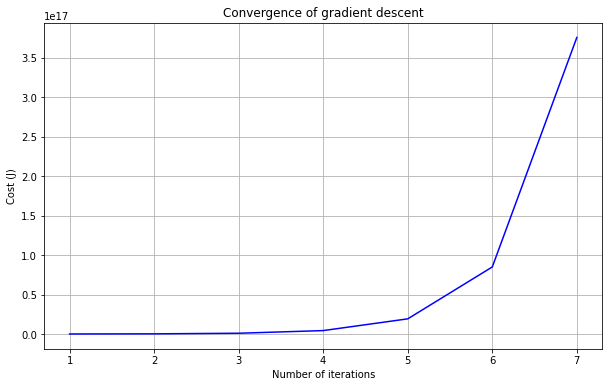

In [333]:

XTrain2, YTrain2, tr2theta, tr2cost, tr2cost_hist = modelnplot(Xenter,Yout,0.0000001,7)

The cost for given values of all parameters  13561972199306.402
Final value of theta = [3.21366662e+01 1.94415593e+05 9.74596109e+01 4.48417224e+01
 6.15745425e+01 2.85736192e+01 5.59068566e+00 1.10549498e+01
 9.32436103e-01 1.14270760e+01 2.91817892e+01 9.17261538e+00]


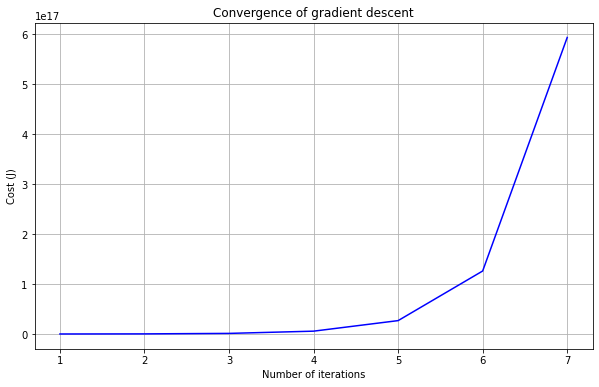

In [334]:
test2 = df_test[num_vars]
Ytst2 = test2.pop('price')
m = len(Ytst2)
xone = np.ones((m,1))
Xtst2 = np.hstack((xone,test2.values))
X = test2
Y = Ytst2

XVal2, YVal2, tr2Valtheta, tr2valcost, tr2valcost_hist = modelnplot(X,Y,0.0000001,7)

The percent error of the model is:  18427.45670898543


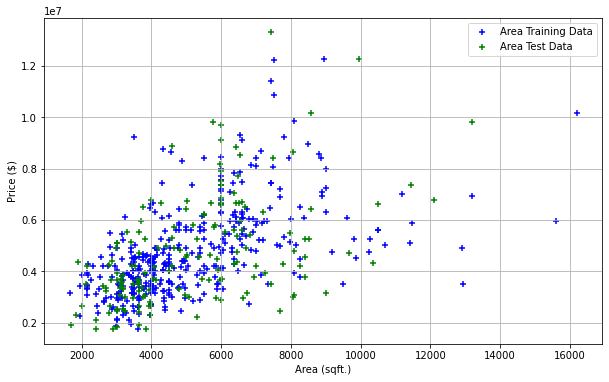

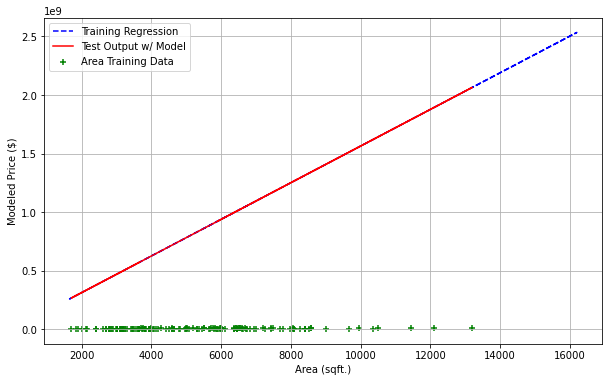

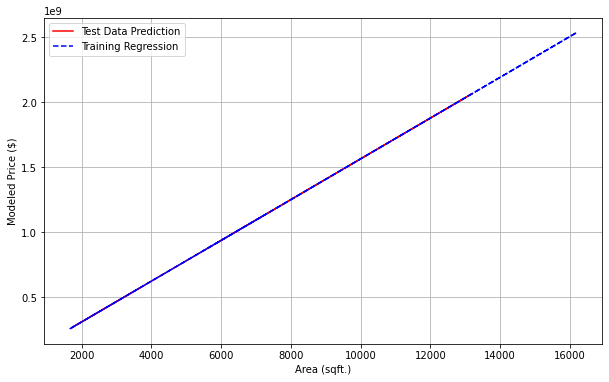

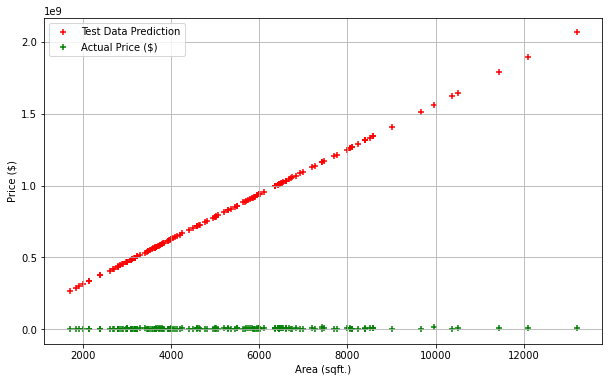

In [335]:
# Validate the test model

Ycheck2 = Xtst2.dot(tr2theta)

plt.figure()
plt.scatter(XTrain2[:,1],YTrain2,color='blue',marker='+',label='Area Training Data')
plt.scatter(Xtst2[:,1],Ytst2,color='green',marker='+',label='Area Test Data')
plt.xlabel('Area (sqft.)')
plt.ylabel('Price ($)')
plt.grid()
plt.legend()

plt.figure()
plt.scatter(Xtst2[:,1],Ytst2,color='green',marker='+',label='Area Training Data')
plt.plot(XTrain2[:,1],XTrain2.dot(tr2theta),color='blue',label='Training Regression',linestyle='dashed')
plt.plot(Xtst2[:,1],Ycheck2,color='red',label='Test Output w/ Model')
plt.xlabel('Area (sqft.)')
plt.ylabel('Modeled Price ($)')
plt.grid()
plt.legend()

plt.figure()
plt.plot(Xtst2[:,1],Ycheck2,color='red',label='Test Data Prediction')
plt.plot(XTrain2[:,1],XTrain2.dot(tr2theta),color='blue',label='Training Regression',linestyle='dashed')
plt.xlabel('Area (sqft.)')
plt.ylabel('Modeled Price ($)')
plt.grid()
plt.legend()

plt.figure()
plt.scatter(Xtst2[:,1],Ycheck2,color='red',marker='+',label='Test Data Prediction')
plt.scatter(Xtst2[:,1],Ytst2,color='green',marker='+',label='Actual Price ($)')
plt.xlabel('Area (sqft.)')
plt.ylabel('Price ($)')
plt.grid()
plt.legend()

# Check out the error between the actual Y values and the predicted/modeled Y values

ydiff2 = ((Ycheck2 - Ytst2)/Ytst2)*100
print('The percent error of the model is: ', np.mean(ydiff2))

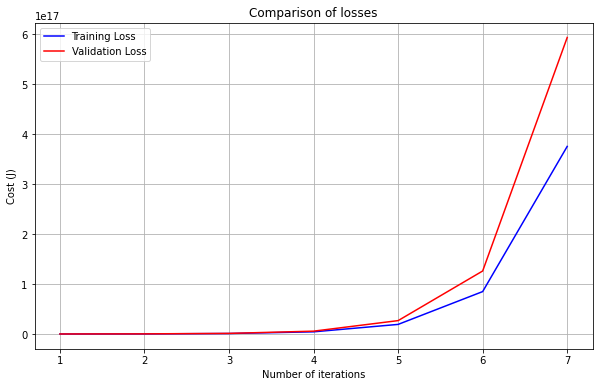

In [336]:
# Compare test and validation loss of Dataset 2

plt.figure()
plt.plot(range(1,len(tr2cost_hist)+1),tr2cost_hist,color='blue',label='Training Loss')
plt.plot(range(1,len(tr2valcost_hist)+1),tr2valcost_hist,color='red',label='Validation Loss')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Comparison of losses')
plt.grid()
plt.legend()



### 1B Observations <a class="anchor" id="sec-bullet"></a> 

Eventhough there were more features used in the validation and training set, it did not change the overall outcome for the best learning rate and iteration (or more trial and error testing will be needed). There was difficulty seeing change in the loss and regression models between training 6 and 12 features because of the large inbalance of values related to the price and several other features. I think we will be able to resolve this later using scaling, similar to the 1A) there seems to be no overfitting ocurring from the derived test data model.

# Problem 2

2.a) Repeat problem 1 a, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. 

* Plot the training and validation losses for both training and validation set based on input standardization and input normalization. 
* Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 a. 
* **Which input scaling achieves the best training? Explain your results.**

 

2.b) Repeat problem 1 b, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. 

* Plot the training and validation losses for both training and validation set based on input standardization and input normalization. 
* Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 b. 
* **Which input scaling achieves the best training? Explain your results.**

In [337]:
# 2a)

num_vars = ['area','bedrooms','bathrooms','stories','parking','price']

df_newtrain = df_train[num_vars]
df_newtest = df_test[num_vars]
df_newtrain.head()
df_newtest.head()

,area,bedrooms,bathrooms,stories,parking,price
316,5900,4,2,2,1,4060000
77,6500,3,2,3,0,6650000
360,4040,2,1,1,0,3710000
90,5000,3,1,2,0,6440000
493,3960,3,1,1,0,2800000


In [338]:
# Initialize / pre-define a few variables for the re-defined scalers of the dataset.
# The df are copied into new variables. 

train_xmm = df_newtrain.copy()
print(train_xmm.head())
train_std = df_newtrain.copy()
val_xmm = df_newtest.copy()
val_std = df_newtest.copy()


     area  bedrooms  bathrooms  stories  parking    price
126  7160         3          1        1        2  5880000
363  3584         2          1        1        0  3710000
370  4280         2          1        1        2  3640000
31   7000         3          1        4        2  8400000
113  9620         3          1        1        2  6083000


In [339]:
# Define your scaling methodology and scaled your data. 
# in this section all data needed for the this problem is scaled once to avoid duplicate lines of code later on. 

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# define standard scaler
scalerstd = StandardScaler()
train_std[num_vars] = scalerstd.fit_transform(train_std[num_vars])
val_std[num_vars] = scalerstd.fit_transform(val_std[num_vars])
print(train_std.head(3))
print('Size of the Training Set (Standardization): ', train_std.shape)
print(val_std.head(3))
print('Size of the Test Set (Standardization): ', val_std.shape)

scaler = MinMaxScaler()

train_xmm[num_vars] = scaler.fit_transform(train_xmm[num_vars])
val_xmm[num_vars] = scaler.fit_transform(val_xmm[num_vars])

print('Size of the Training Set (Min and Max): ', train_xmm.shape)
print('Size of the Test Set (Min and Max): ', val_xmm.shape)
print(val_xmm.head(2))



         area  bedrooms  bathrooms  stories   parking     price
126  0.934301  0.055861  -0.553238 -0.90766  1.591603  0.630538
363 -0.710246 -1.274325  -0.553238 -0.90766 -0.800511 -0.593759
370 -0.390167 -1.274325  -0.553238 -0.90766  1.591603 -0.633253
Size of the Training Set (Standardization):  (381, 6)
         area  bedrooms  bathrooms   stories   parking     price
316  0.324279  1.449437   1.182324  0.160144  0.273778 -0.345402
77   0.603020  0.026038   1.182324  1.302038 -0.821333  0.902680
360 -0.539816 -1.397361  -0.613057 -0.981750 -0.821333 -0.514061
Size of the Test Set (Standardization):  (164, 6)
Size of the Training Set (Min and Max):  (381, 6)
Size of the Test Set (Min and Max):  (164, 6)
         area  bedrooms  bathrooms   stories   parking     price
316  0.365217      0.50        0.5  0.333333  0.333333  0.200000
77   0.417391      0.25        0.5  0.666667  0.000000  0.424242


Text(0, 0.5, 'Price ($)')

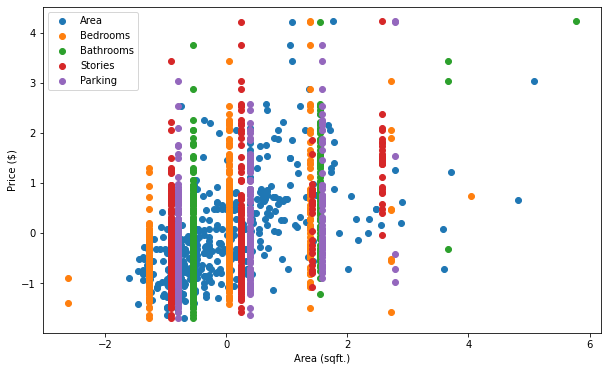

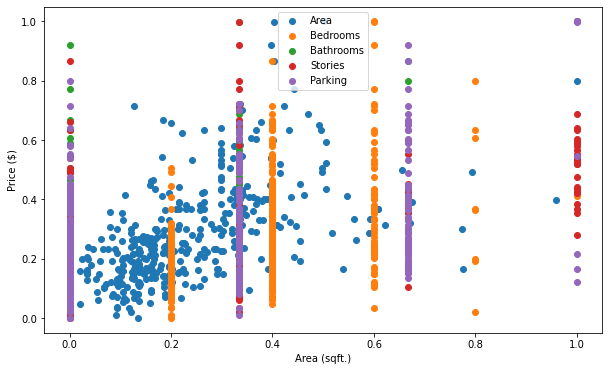

In [340]:
# Now we can plot everything together.
plt.figure()
plt.scatter(train_std['area'],train_std['price'],label='Area')
plt.scatter(train_std['bedrooms'],train_std['price'],label='Bedrooms')
plt.scatter(train_std['bathrooms'],train_std['price'],label='Bathrooms')
plt.scatter(train_std['stories'],train_std['price'],label='Stories')
plt.scatter(train_std['parking'],train_std['price'],label='Parking')
plt.legend()
plt.xlabel('Area (sqft.)')
plt.ylabel('Price ($)')

# Min and Max Normaliation

plt.figure()
plt.scatter(train_xmm['area'],train_xmm['price'],label='Area')
plt.scatter(train_xmm['bedrooms'],train_xmm['price'],label='Bedrooms')
plt.scatter(train_xmm['bathrooms'],train_xmm['price'],label='Bathrooms')
plt.scatter(train_xmm['stories'],train_xmm['price'],label='Stories')
plt.scatter(train_xmm['parking'],train_xmm['price'],label='Parking')
plt.legend()
plt.xlabel('Area (sqft.)')
plt.ylabel('Price ($)')

The cost for given values of all parameters  0.5000000000000001
Final value of theta = [8.92141421e-17 3.96312871e-01 8.42522287e-02 3.12403739e-01
 2.21924062e-01 1.90687413e-01]
The cost for given values of all parameters  0.055402071063808705
Final value of theta = [0.155547   0.12706572 0.10277212 0.09841697 0.120566   0.11569331]


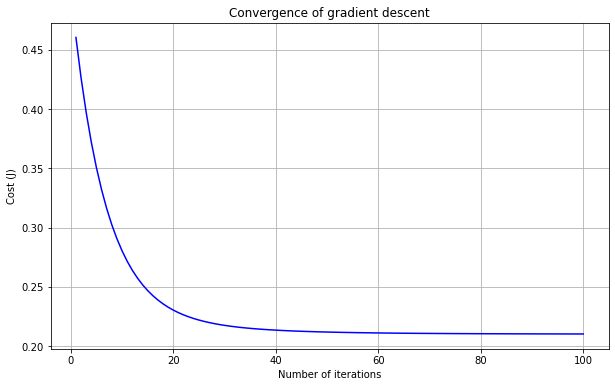

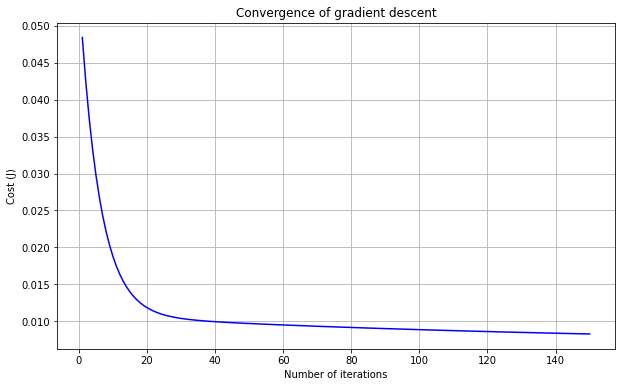

In [341]:
# Extract the price, define it as an output, and redefine variable/array for all other variables and insert it into the 
# modelnplot function

# This involved a manual effort to determine the best learning rate and iterations needed for the to achieve the minimum loss possible

# Standardization dataset
Y = train_std.pop('price')
X = train_std
XTR_Std, YTR_Std, TRT_Std, TRCost_Std, TRCost_Hist_Std = modelnplot(X,Y,0.04,100)

#Normalization dataset
Ym = train_xmm.pop('price')
Xm = train_xmm

XTR_xmm, YTR_xmm, TRT_xmm, TRCost_xmm, TRCost_Hist_xmm = modelnplot(Xm,Ym,0.06,150)

The plots above show the convergence of the gradient descent of the standardization & normalization dataset, respectively. Looks like the normalization (min-max) of the dataset allowed the gradient descent to achieve a very significantly small loss. 

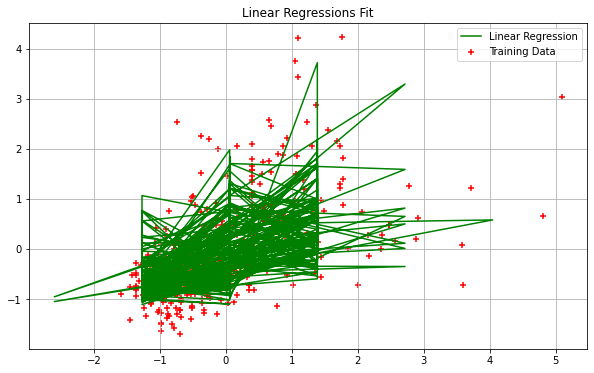

In [342]:
# Attempt plot multivariable regression on scaled data (not possible in this form)

plt.figure()
plt.scatter(XTR_Std[:,1],YTR_Std,color='red',marker='+',label='Training Data')
plt.plot(XTR_Std[:,2],XTR_Std.dot(TRT_Std),color='green',label='Linear Regression')
plt.rcParams['figure.figsize'] = (10,6)
plt.grid()
plt.title('Linear Regressions Fit')
plt.legend()


In [343]:
# Looking into Validation and Test set

Y = val_std.pop('price')
X = val_std

Yxm = val_xmm.pop('price')
Xxm = val_xmm
print(Yxm.head())
print(Xxm.head())

316    0.200000
77     0.424242
360    0.169697
90     0.406061
493    0.090909
Name: price, dtype: float64
         area  bedrooms  bathrooms   stories   parking
316  0.365217      0.50        0.5  0.333333  0.333333
77   0.417391      0.25        0.5  0.666667  0.000000
360  0.203478      0.00        0.0  0.000000  0.000000
90   0.286957      0.25        0.0  0.333333  0.000000
493  0.196522      0.25        0.0  0.000000  0.000000


The cost for given values of all parameters  0.5
Final value of theta = [1.99569358e-16 3.34022391e-01 7.29555674e-02 2.81767600e-01
 2.95953093e-01 1.64127708e-01]
The cost for given values of all parameters  0.05047784525129342
Final value of theta = [0.12227262 0.12760627 0.07075668 0.13091553 0.13751422 0.11005753]


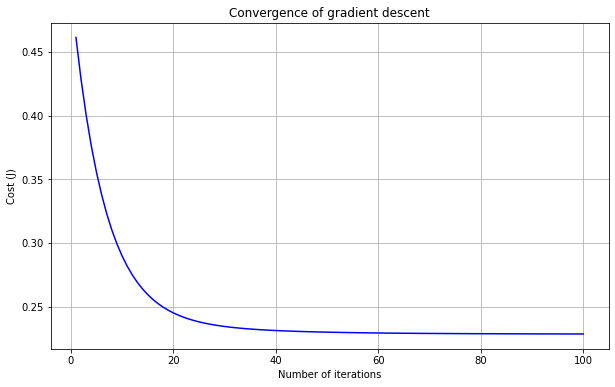

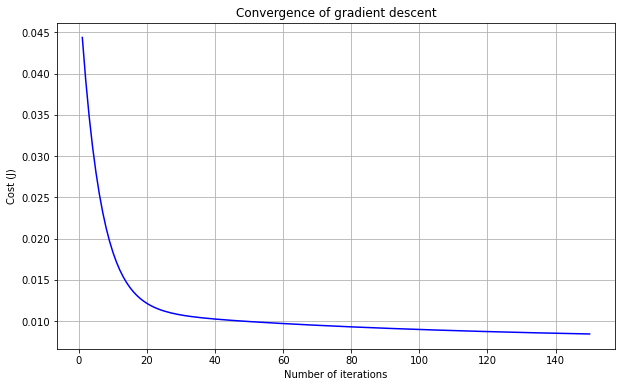

In [344]:
# Determine the losses of the test set using the same rates in the training set.
XVal2_Std, YVal2_std, tr2Valtheta_std, tr2valcost_std, tr2valcost_hist_std = modelnplot(X,Y,0.04,100)
XVal2_xmm, YVal2_xmm, tr2Valtheta_xmm, tr2valcost_xmm, tr2valcost_hist_xmm = modelnplot(Xxm,Yxm,0.06,150)

The curves are very similar to the results of the training set. The normalization of the dataset in this case also allowed it to achieve a *very* minimal loss.

The percent error of the model is:  -13.718116824415375


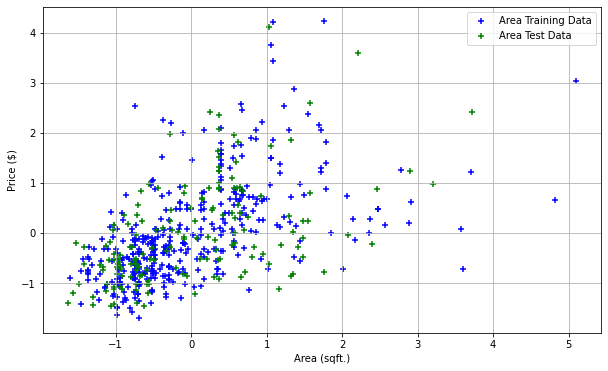

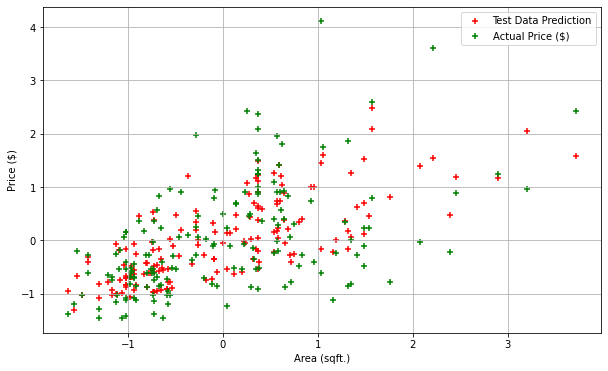

In [345]:
# Validate the test model

Ycheck = XVal2_Std.dot(TRT_Std)

plt.figure()
plt.scatter(XTR_Std[:,1],YTR_Std,color='blue',marker='+',label='Area Training Data')
plt.scatter(XVal2_Std[:,1],YVal2_std,color='green',marker='+',label='Area Test Data')
plt.xlabel('Area (sqft.)')
plt.ylabel('Price ($)')
plt.grid()
plt.legend()

plt.figure()
plt.scatter(XVal2_Std[:,1],Ycheck,color='red',marker='+',label='Test Data Prediction')
plt.scatter(XVal2_Std[:,1],YVal2_std,color='green',marker='+',label='Actual Price ($)')
plt.xlabel('Area (sqft.)')
plt.ylabel('Price ($)')
plt.grid()
plt.legend()

# Check out the error between the actual Y values and the predicted/modeled Y values

ydiff = ((Ycheck - YVal2_std)/YVal2_std)*100
print('The percent error of the model is: ', np.mean(ydiff))

The percent error of the model is:  -91.86468619339672


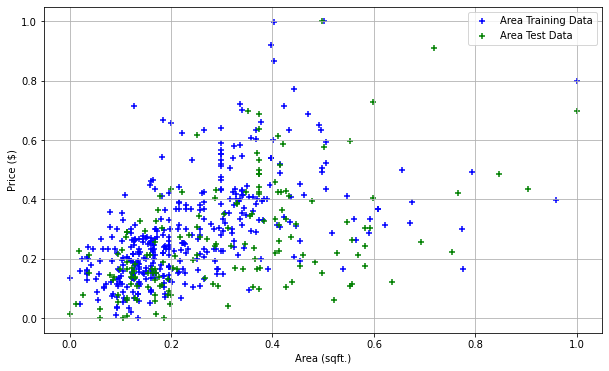

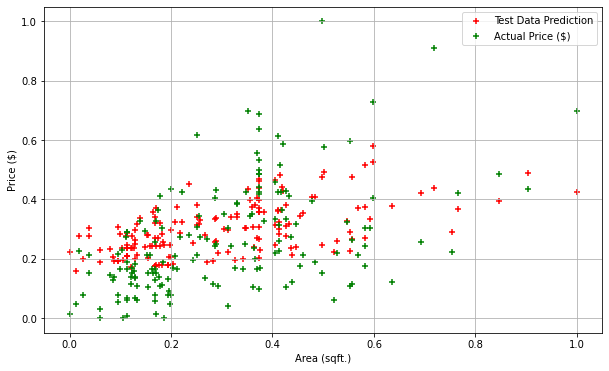

In [346]:
# Validate the test model

Ycheck = XVal2_xmm.dot(TRT_xmm)

plt.figure()
plt.scatter(XTR_xmm[:,1],YTR_xmm,color='blue',marker='+',label='Area Training Data')
plt.scatter(XVal2_xmm[:,1],YVal2_xmm,color='green',marker='+',label='Area Test Data')
plt.xlabel('Area (sqft.)')
plt.ylabel('Price ($)')
plt.grid()
plt.legend()


plt.figure()
plt.scatter(XVal2_xmm[:,1],Ycheck,color='red',marker='+',label='Test Data Prediction')
plt.scatter(XVal2_xmm[:,1],YVal2_xmm,color='green',marker='+',label='Actual Price ($)')
plt.xlabel('Area (sqft.)')
plt.ylabel('Price ($)')
plt.grid()
plt.legend()

# Check out the error between the actual Y values and the predicted/modeled Y values

ydiff = ((Ycheck - YVal2_std)/YVal2_std)*100
print('The percent error of the model is: ', np.mean(ydiff))

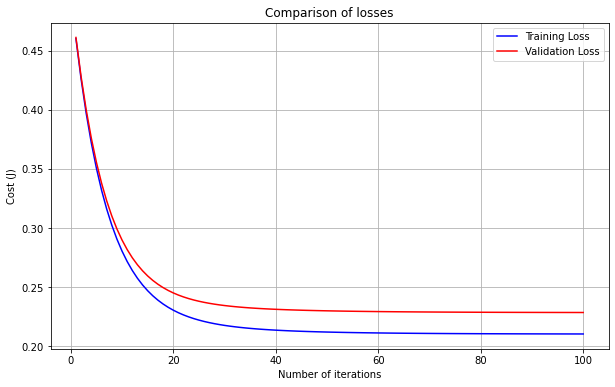

In [347]:
plt.figure()
plt.plot(range(1,len(TRCost_Hist_Std)+1),TRCost_Hist_Std,color='blue',label='Training Loss')
plt.plot(range(1,len(tr2valcost_hist_std)+1),tr2valcost_hist_std,color='red',label='Validation Loss')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Comparison of losses')
plt.grid()
plt.legend()


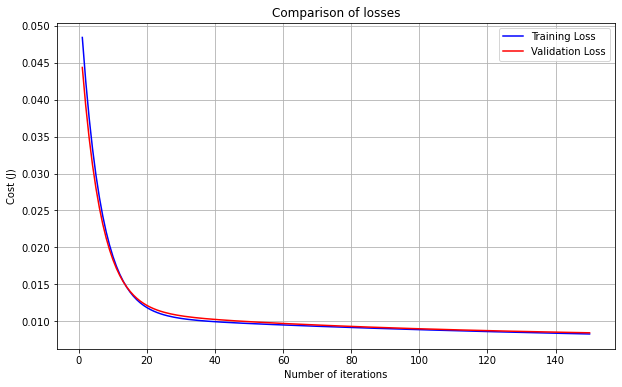

In [348]:
plt.figure()
plt.plot(range(1,len(TRCost_Hist_xmm)+1),TRCost_Hist_xmm,color='blue',label='Training Loss')
plt.plot(range(1,len(tr2valcost_hist_xmm)+1),tr2valcost_hist_xmm,color='red',label='Validation Loss')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Comparison of losses')
plt.grid()
plt.legend()

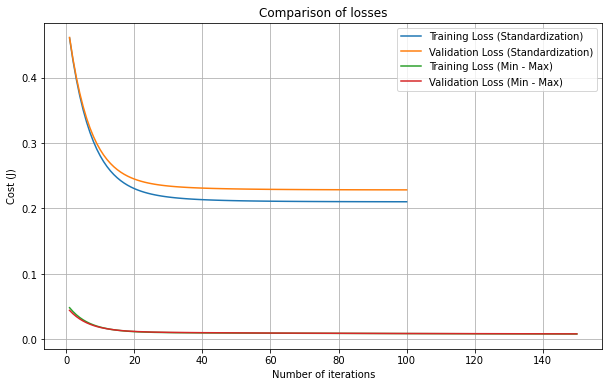

In [349]:
plt.figure()
plt.plot(range(1,len(TRCost_Hist_Std)+1),TRCost_Hist_Std,label='Training Loss (Standardization)')
plt.plot(range(1,len(tr2valcost_hist_std)+1),tr2valcost_hist_std,label='Validation Loss (Standardization)')
plt.plot(range(1,len(TRCost_Hist_xmm)+1),TRCost_Hist_xmm,label='Training Loss (Min - Max) ')
plt.plot(range(1,len(tr2valcost_hist_xmm)+1),tr2valcost_hist_xmm,label='Validation Loss (Min - Max)')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Comparison of losses')
plt.grid()
plt.legend()



The y error determined between the 2 test sets shows that a scaled model significantly increases performance / *accuracy*, thus far. It seems the use of the scaling creates a more appropriate model. A specific type of scaling that is useful in this particular case so far is the normalization option. 

In [350]:
## Add more variables

num_vars = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','price']


df_newtrain = df_train[num_vars]
df_newtest = df_test[num_vars]
df_newtrain.head()
df_newtest.head()

train_xmm2 = df_newtrain.copy()
print(train_xmm2.head())
train_std2 = df_newtrain.copy()
val_xmm2 = df_newtest.copy()
val_std2 = df_newtest.copy()

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# define standard scaler
scalerstd = StandardScaler()
train_std2[num_vars] = scalerstd.fit_transform(train_std2[num_vars])
val_std2[num_vars] = scalerstd.fit_transform(val_std2[num_vars])
print(train_std2.head(3))
print('Size of the Training Set (Standardization): ', train_std2.shape)
print(val_std2.head(3))
print('Size of the Test Set (Standardization): ', val_std2.shape)
# print(train_std[1,:])
# print(train_std[1,-1])
# print(train_std[1,0:-1])

scaler = MinMaxScaler()

train_xmm2[num_vars] = scaler.fit_transform(train_xmm2[num_vars])
val_xmm2[num_vars] = scaler.fit_transform(val_xmm2[num_vars])

print('Size of the Training Set (Min and Max): ', train_xmm2.shape)
print('Size of the Test Set (Min and Max): ', val_xmm2.shape)
print(val_xmm2.head(2))


Y = train_std2.pop('price')
X = train_std2



Ym = train_xmm2.pop('price')
Xm = train_xmm2


     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
126  7160         3          1        1         1          0         1   
363  3584         2          1        1         1          0         0   
370  4280         2          1        1         1          0         0   
31   7000         3          1        4         1          0         0   
113  9620         3          1        1         1          0         1   

     hotwaterheating  airconditioning  parking  prefarea    price  
126                0                0        2         1  5880000  
363                1                0        0         0  3710000  
370                0                1        2         0  3640000  
31                 0                1        2         0  8400000  
113                0                0        2         1  6083000  
         area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
126  0.934301  0.055861  -0.553238 -0.90766  0.397561  -0.478573  1.3

The cost for given values of all parameters  0.5000000000000001
Final value of theta = [3.79049373e-17 2.81581808e-01 9.21696440e-02 2.72495072e-01
 1.79167541e-01 1.05756531e-01 8.81823752e-02 1.10913443e-01
 7.20401704e-02 1.88414591e-01 1.57555963e-01 1.21690818e-01]
The cost for given values of all parameters  0.055402071063808705
Final value of theta = [0.04412511 0.12873761 0.07601157 0.13700951 0.11638996 0.05807721
 0.04211176 0.0422237  0.04678136 0.09131357 0.1074391  0.05558444]


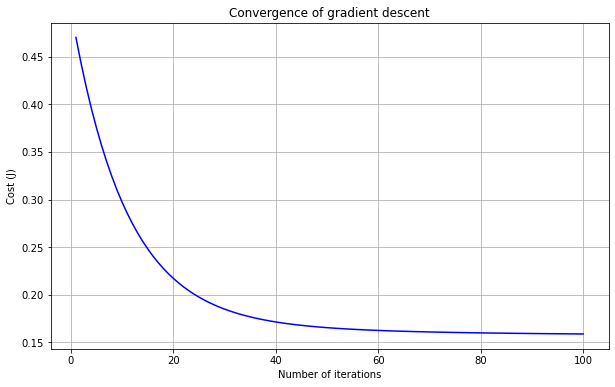

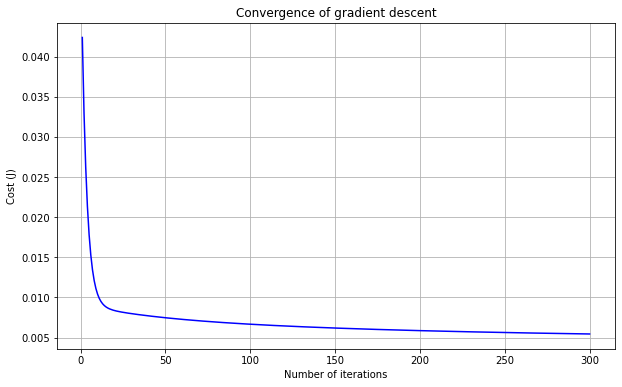

In [351]:
XTR_Std2, YTR_Std2, TRT_Std2, TRCost_Std2, TRCost_Hist_Std2 = modelnplot(X,Y,0.02,100)
XTR_xmm2, YTR_xmm2, TRT_xmm2, TRCost_xmm2, TRCost_Hist_xmm2 = modelnplot(Xm,Ym,0.06,300)



316    0.200000
77     0.424242
360    0.169697
90     0.406061
493    0.090909
Name: price, dtype: float64
         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
316  0.365217      0.50        0.5  0.333333       0.0        0.0       1.0   
77   0.417391      0.25        0.5  0.666667       1.0        0.0       0.0   
360  0.203478      0.00        0.0  0.000000       1.0        0.0       0.0   
90   0.286957      0.25        0.0  0.333333       1.0        0.0       0.0   
493  0.196522      0.25        0.0  0.000000       1.0        0.0       0.0   

     hotwaterheating  airconditioning   parking  prefarea  
316              0.0              0.0  0.333333       0.0  
77               0.0              1.0  0.000000       1.0  
360              0.0              0.0  0.000000       0.0  
90               0.0              1.0  0.000000       0.0  
493              0.0              0.0  0.000000       0.0  
The cost for given values of all parameters  0.5
Final va

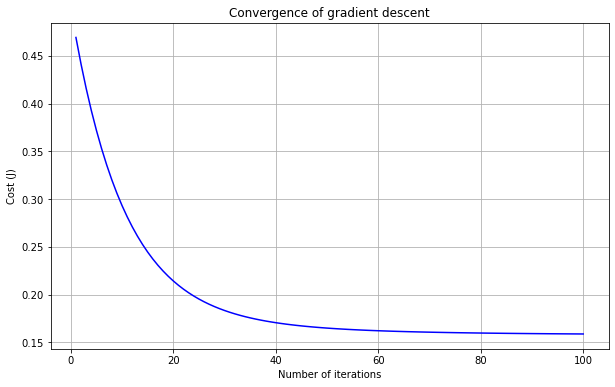

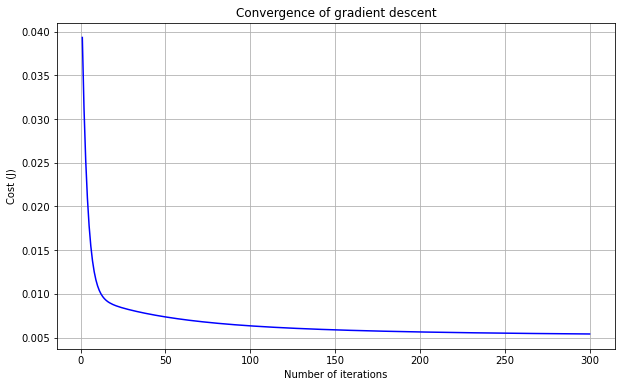

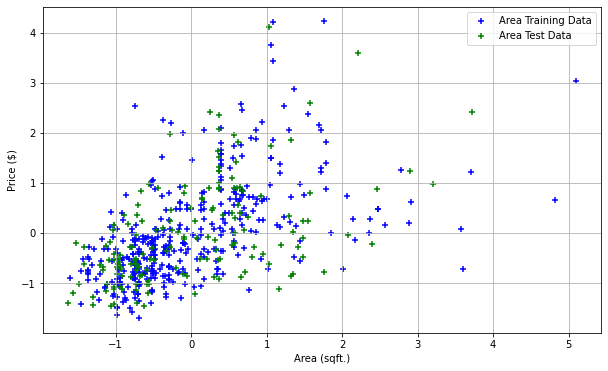

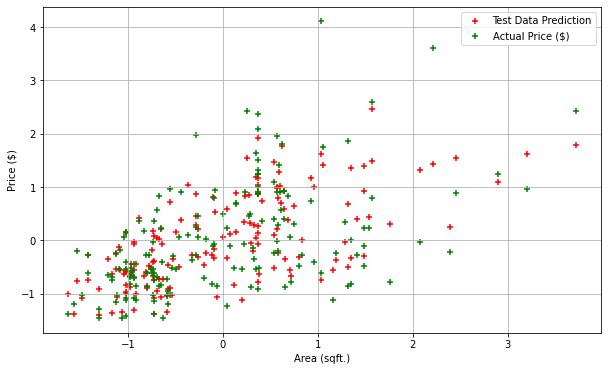

In [352]:
Y = val_std2.pop('price')
X = val_std2

Yxm = val_xmm2.pop('price')
Xxm = val_xmm2
print(Yxm.head())
print(Xxm.head())

XVal2_Std2, YVal2_std2, tr2Valtheta_std2, tr2valcost_std2, tr2valcost_hist_std2 = modelnplot(X,Y,0.02,100)
XVal2_xmm2, YVal2_xmm2, tr2Valtheta_xmm2, tr2valcost_xmm2, tr2valcost_hist_xmm2 = modelnplot(Xxm,Yxm,0.06,300)

# Validate the test model

Ycheck = XVal2_Std2.dot(TRT_Std2)

plt.figure()
plt.scatter(XTR_Std2[:,1],YTR_Std2,color='blue',marker='+',label='Area Training Data')
plt.scatter(XVal2_Std2[:,1],YVal2_std2,color='green',marker='+',label='Area Test Data')
plt.xlabel('Area (sqft.)')
plt.ylabel('Price ($)')
plt.grid()
plt.legend()


plt.figure()
plt.scatter(XVal2_Std2[:,1],Ycheck,color='red',marker='+',label='Test Data Prediction')
plt.scatter(XVal2_Std2[:,1],YVal2_std2,color='green',marker='+',label='Actual Price ($)')
plt.xlabel('Area (sqft.)')
plt.ylabel('Price ($)')
plt.grid()
plt.legend()

# Check out the error between the actual Y values and the predicted/modeled Y values

ydiff = ((Ycheck - YVal2_std2)/YVal2_std2)*100
print('The percent error of the model (Standardization) is: ', np.mean(ydiff))


Ycheck = XVal2_xmm2.dot(TRT_xmm2)

ydiff = ((Ycheck - YVal2_xmm2)/YVal2_xmm2)*100
print('The percent error of the model (Normalization) is: ', np.mean(ydiff))

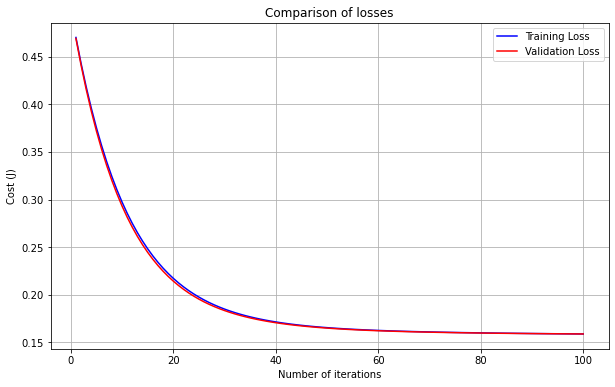

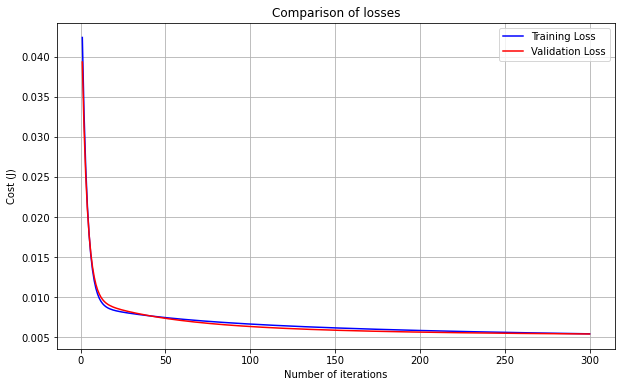

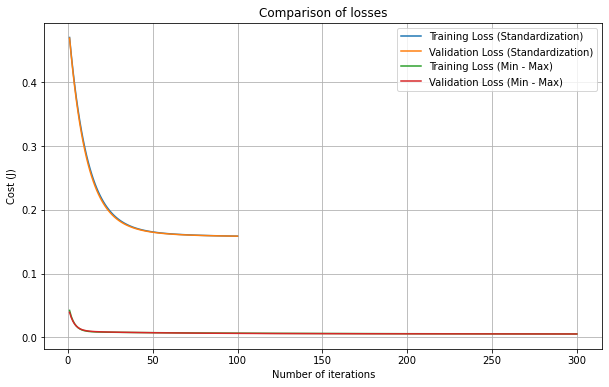

In [353]:
plt.figure()
plt.plot(range(1,len(TRCost_Hist_Std2)+1),TRCost_Hist_Std2,color='blue',label='Training Loss')
plt.plot(range(1,len(tr2valcost_hist_std2)+1),tr2valcost_hist_std2,color='red',label='Validation Loss')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Comparison of losses')
plt.grid()
plt.legend()

plt.figure()
plt.plot(range(1,len(TRCost_Hist_xmm2)+1),TRCost_Hist_xmm2,color='blue',label='Training Loss')
plt.plot(range(1,len(tr2valcost_hist_xmm2)+1),tr2valcost_hist_xmm2,color='red',label='Validation Loss')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Comparison of losses')
plt.grid()
plt.legend()

plt.figure()
plt.plot(range(1,len(TRCost_Hist_Std2)+1),TRCost_Hist_Std2,label='Training Loss (Standardization)')
plt.plot(range(1,len(tr2valcost_hist_std2)+1),tr2valcost_hist_std2,label='Validation Loss (Standardization)')
plt.plot(range(1,len(TRCost_Hist_xmm2)+1),TRCost_Hist_xmm2,label='Training Loss (Min - Max) ')
plt.plot(range(1,len(tr2valcost_hist_xmm2)+1),tr2valcost_hist_xmm2,label='Validation Loss (Min - Max)')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Comparison of losses')
plt.grid()
plt.legend()

## Observations

Overall the Min and max form of normalization fits this dataset the best, it is evident when plotting the losses. The standardization approach doesn't account for the real life implementation of a sales price. The pricing of a home will not fall negative and chances of a  negative value to exist in the original dataset, is not possible. If it does, that data point will become become questionable, requiring a more extensive form of data cleaning. In this particular complex model, scaling would be required overall to balance out the feature values, as there are relatively large and small values throughout the dataset. The baseline evaluation of the dataset showed that the area and price parameters created a large offset parameter values causing is to seem perfectly linear, when there were actually multi-variables in the model.

# Problem 3

3.a) Repeat problem 2 a, this time by **adding parameters penalty to your loss function**. 

*Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.*

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or *normalization*). Explain your results and compare them against problem 2 a. 

 

3.b) Repeat problem 2 b, this time by adding parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 b

The cost for given values of all parameters  0.5000000000000001
Final value of theta = area        -0.042656
bedrooms    -0.031162
bathrooms   -0.041665
stories     -0.031875
parking     -0.029967
dtype: float64
The cost for given values of all parameters  0.055402071063808705
Final value of theta = area        -0.005072
bedrooms    -0.007517
bathrooms   -0.002407
stories     -0.005810
parking     -0.005046
dtype: float64
The cost for given values of all parameters  0.5000000000000001
Final value of theta = area              -0.053309
bedrooms          -0.038783
bathrooms         -0.050978
stories           -0.039405
mainroad          -0.028277
guestroom         -0.026948
basement          -0.021043
hotwaterheating   -0.006707
airconditioning   -0.045064
parking           -0.037293
prefarea          -0.028133
dtype: float64
The cost for given values of all parameters  0.055402071063808705
Final value of theta = area              -0.005490
bedrooms          -0.008152
bathrooms         -

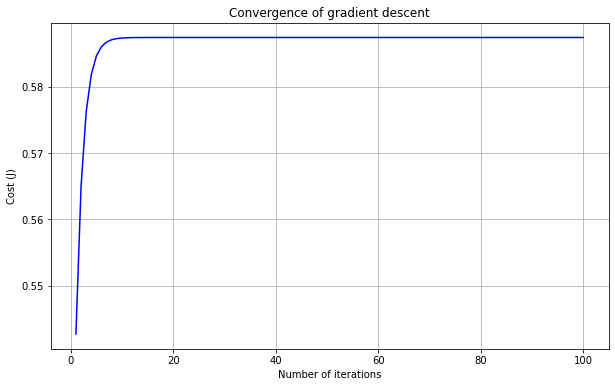

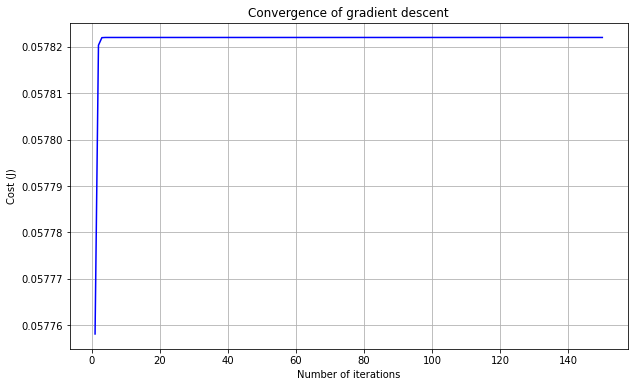

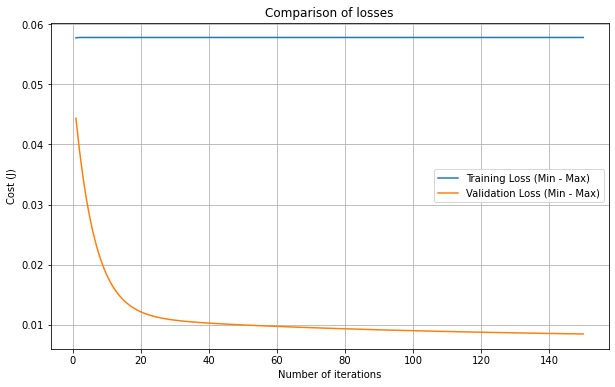

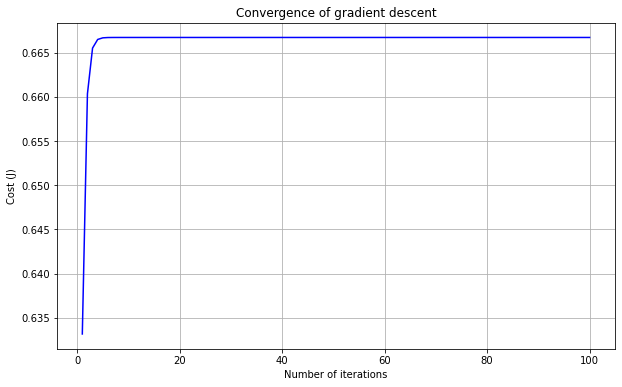

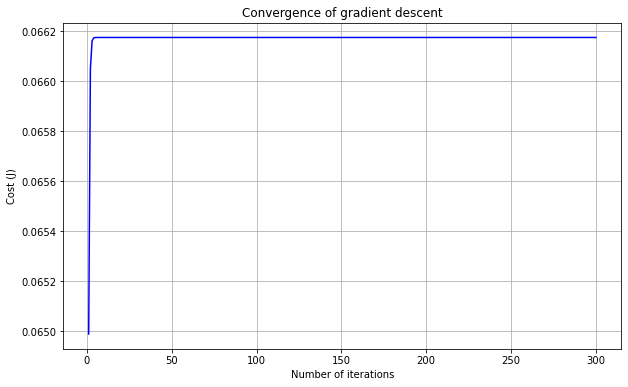

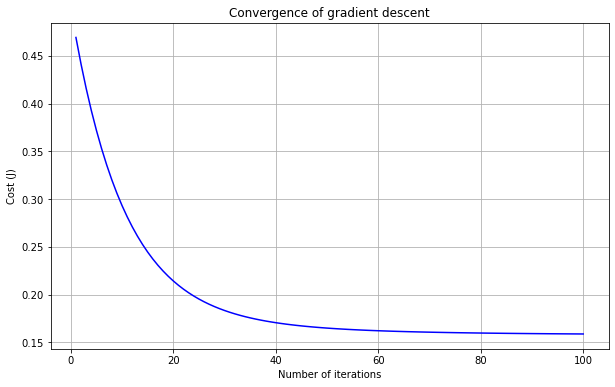

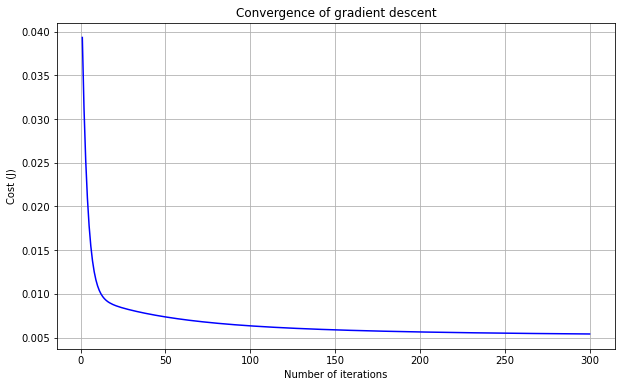

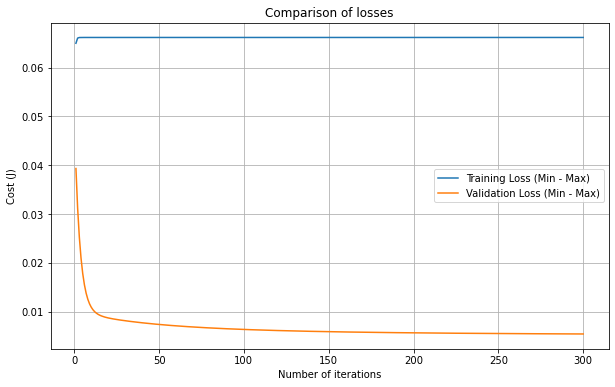

In [354]:
# 5 Variables

X = train_std
TRT_Std, TRCost_Std, TRCost_Hist_Std = modelpenalty(X,YTR_Std,0.04,100,4000)

Xm = train_xmm

TRT_xmm, TRCost_xmm, TRCost_Hist_xmmx = modelpenalty(Xm,YTR_xmm,0.06,150,10)


X = val_std
Xxm = val_xmm

plt.figure()
plt.plot(range(1,len(TRCost_Hist_xmmx)+1),TRCost_Hist_xmmx,label='Training Loss (Min - Max) ')
plt.plot(range(1,len(tr2valcost_hist_xmm)+1),tr2valcost_hist_xmm,label='Validation Loss (Min - Max)')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Comparison of losses')
plt.grid()
plt.legend()


# 11 Variables
X = train_std2
Xm = train_xmm2


TRT_Std2, TRCost_Std2, TRCost_Hist_Std2x = modelpenalty(X,YTR_Std2,0.08,100,10)
TRT_xmm2, TRCost_xmm2, TRCost_Hist_xmm2x = modelpenalty(Xm,YTR_xmm2,0.06,300,56)

X = val_std2
Xxm = val_xmm2

XVal2_Std2, YVal2_std2, tr2Valtheta_std2, tr2valcost_std2, tr2valcost_hist_std2 = modelnplot(X,YVal2_std2,0.02,100)
XVal2_xmm2, YVal2_xmm2, tr2Valtheta_xmm2, tr2valcost_xmm2, tr2valcost_hist_xmm2 = modelnplot(Xxm,YVal2_xmm2,0.06,300)

plt.figure()
plt.plot(range(1,len(TRCost_Hist_xmm2x)+1),TRCost_Hist_xmm2x,label='Training Loss (Min - Max) ')
plt.plot(range(1,len(tr2valcost_hist_xmm2)+1),tr2valcost_hist_xmm2,label='Validation Loss (Min - Max)')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Comparison of losses')
plt.grid()
plt.legend()

### Observations

Since min and max was the best normalization use case for this dataset, the plots above show the loss using **Parameter Penalization** and the regular loss of the dataset.

In problem the  `gradient_descent` function was altered to include the following lines:         
`reg = theta * (1 - (alpha*(lmba/m))); sum_delta = reg-((alpha / m) * X.transpose().dot(errors))` as well excluding the initial constant value parameter when calculating theta. That function was redefined as `gd_pen` and used in the `modelpenalty` function. 

This alteration changed the overall profile of the loss curve and presented a higher loss, and a more linear appearance. I think there maybe a small mistake in the calculation, not quite sure what I may not have applied. I don't think I was able to succesfully achieve **Parameter Penalization** in this case.

If it is indeed applied correctly, it would make some sense. In the examples in Lecture 5 slides when the parameter penalities are applied the more *shapely* curve then becomes flatter, eliminating the influence of a parameter / multi-parameters. This would be a safe use case to avoid any instances in overfitting and provide a more generalized model for real world practices.

https://github.com/thachkse/Intro-to-ML/tree/main/HW_1